In [168]:
import os
import glob
import numpy as np
import itertools
import random

from skimage import feature
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

from scipy import ndimage
%matplotlib inline

In [169]:
path = 'data/flowers/'

In [170]:
img_width = img_height=128

In [171]:
def preProcessing(img):
    
    img = resizeImage(img)
    img = RGB2Gray(img)
    img = median_filter(img)
    img = vectorizeImage(img)
    return img

In [172]:
def vectorizeImage(img, img_width=128, img_height=128):
    return img.reshape(-1,img_width * img_height)

In [173]:
def median_filter(img, factor=2):
    
    filtered = ndimage.median_filter(img, factor)
    img = img - filtered
    return img   

In [174]:
def resizeImage(img, img_width=128, img_height=128):
    img = img.resize((img_width, img_height))
    return np.array(img)

In [175]:
def localBinaryPatterns(img, numPoints=24, radius=2):
    
    lbp = feature.local_binary_pattern(img, numPoints,
                    radius, method="uniform")
    return lbp

In [176]:
def RGB2Gray(img):
    return np.dot(img[...,:3], [0.299, 0.587, 0.114]).astype(int)

In [181]:
def get_data(path):
    X, y =  [], []
    count = 0
    labels = {}
    for subdir, dirs, files in os.walk(path):
        if subdir.split('/')[-1] != '':
            labels[count] = subdir.split('/')[-1]
            path_folder = os.path.join(subdir, '*.jpg')
            filesPath = glob.glob(path_folder) 
            
            for fileName in filesPath:
                with Image.open(fileName) as img:
                    img = preProcessing(img)
                    X.append(img)

            y.extend(np.full((1, len(files)), count, dtype=int)[0])
            count+=1
    return (X, y, labels)

In [182]:
X, y, labels = get_data(path)

In [183]:
def showCamaraPhotos(X, y, labels, img_width=128, img_height=128):

    idx = random.randint(0,len(X))
    plt.title(labels[y[idx]])
    img = X[idx].reshape(img_width, img_height)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

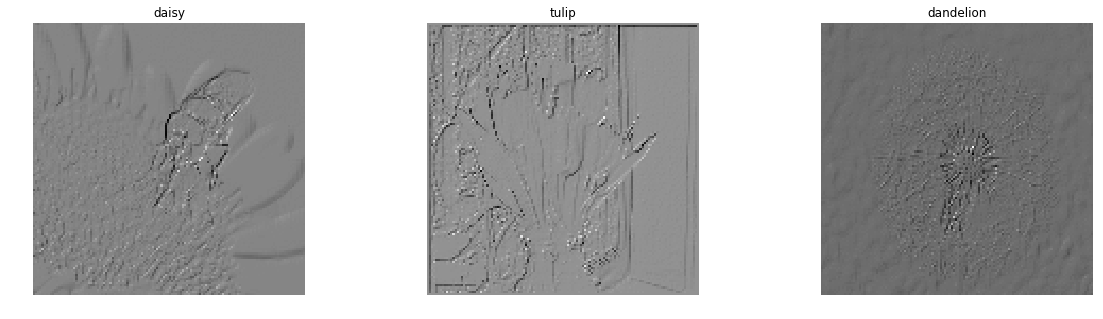

In [184]:
plt.figure(figsize=(20,5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    showCamaraPhotos(X, y, labels)

In [189]:
X = np.squeeze(np.array(X), axis=1)